In [3]:
import pandas as pd
import sqlite3 as sql
import numpy as np

In [4]:
connection = sql.connect("../Data/password_data.sqlite")

In [5]:
df = pd.read_sql_query("SELECT * FROM USERS" , con= connection)

In [6]:
df.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


In [7]:
X = df['password']
y = df['strength']

In [8]:
df.drop(['index'] , axis=1 , inplace= True)

In [9]:
df.shape

(100000, 2)

In [10]:
df['password'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [11]:
df.isnull().any()

password    False
strength    False
dtype: bool

In [12]:
(df['strength'] < 0).sum()

0

In [13]:
df['strength'].unique()

array([1, 2, 0])

In [14]:
if(any(df['password'][0].find(str(i)) for i in range(10))):
    print("Yes")

Yes


In [15]:
any(df['password'][0].find(str(i)) for i in range(10))

True

In [16]:
df[df['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [18]:
def find_semantics(row):
    for char in row:
        if char  in string.punctuation:
            return 1
        else:
            pass

In [19]:
df[df['password'].apply(find_semantics) == 1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [20]:
df['length'] = df['password'].str.len()

In [21]:
df.head()

,password,strength,length
0,zxe870819,1,9
1,xw46454nr23l,1,12
2,soporte13,1,9
3,accounts6000webhost.com,2,23
4,c443balg,1,8


In [22]:
len([char for char in "PalkeshGOII111" if char.isdigit()]) / len("PalkeshGOII")

0.2727272727272727

In [23]:
def freq_lowercase(row):
    return len([char for char in row if char.islower()]) / len(row)
def freq_uppercase(row):
    return len([char for char in row if char.isupper()]) / len(row)
def freq_numericcase(row):    
    return len([char for char in row if char.isdigit()]) / len(row)

In [24]:
df['lower_freq'] = np.round(df["password"].apply(freq_lowercase) , 3)
df['upper_freq'] = np.round(df["password"].apply(freq_uppercase) , 3)
df['numeric_freq'] = np.round(df["password"].apply(freq_numericcase) , 3)

In [25]:
df.head()

,password,strength,length,lower_freq,upper_freq,numeric_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [26]:
def freq_special_case(row):    
    return len([char for char in row if not char.isalnum()]) / len(row)

In [27]:
df['special_char_freq'] = df['password'].apply(freq_special_case)

In [28]:
df.head()

,password,strength,length,lower_freq,upper_freq,numeric_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [29]:
cols = df.select_dtypes(exclude=['object']).columns

In [30]:
cols = cols.drop(['strength'])

In [31]:
for col in cols:
    print(df[[col, 'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print("\n")

         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


         lower_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.708050  0.714
1               0.0  0.923  0.630067  0.667
2               0.0  0.917  0.424679  0.400


         upper_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.012872  0.000
1               0.0  0.923  0.007915  0.000
2               0.0  0.889  0.367633  0.429


         numeric_freq                        
                  min    max      mean median
strength                                     
0                 0.0  1.000  0.275383  0.286
1                 0.0  0.923  0.360123  0.333
2 

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
def get_dist(data, feature):
    plt.subplot(1,2,1)
    sns.violinplot(x= 'strength' , y = feature , data = data)
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength'] == 0][feature] , color='red' , label= "0", hist=False)
    sns.distplot(data[data['strength'] == 1][feature] , color='blue', label= "1", hist=False)
    sns.distplot(data[data['strength'] == 2][feature] , color='orange', label= "2" , hist=False)
    plt.legend()
    plt.show()

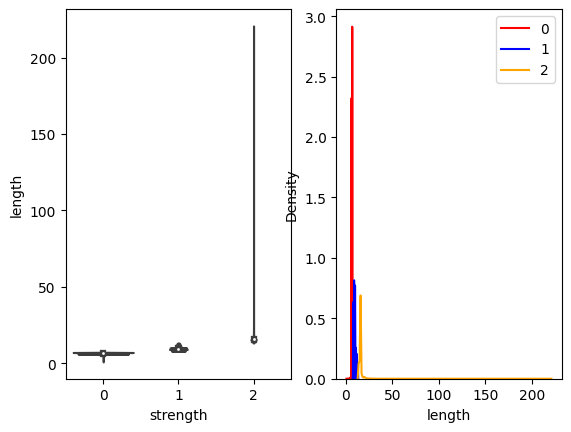

In [34]:
from warnings import filterwarnings
filterwarnings('ignore')
get_dist(df , "length")

In [35]:
df.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'numeric_freq', 'special_char_freq'],
      dtype='object')

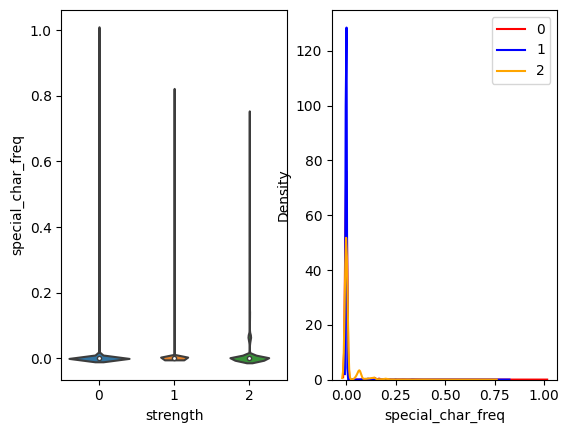

In [36]:
get_dist(df , 'special_char_freq')

In [37]:
x = list(df["password"])

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
vectorizer = TfidfVectorizer(analyzer="char")

In [40]:
X = vectorizer.fit_transform(x)

In [44]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
df2 = pd.DataFrame(X.toarray() , columns=vectorizer.get_feature_names_out())

In [48]:
df2["length"] = df['length']
df2["lowercase_freq"] = df['lower_freq']

In [50]:
df2.head().shape

(5, 101)

In [51]:
y = df["strength"]

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.20)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
clf = LogisticRegression(multi_class="multinomial")

In [55]:
clf.fit(X_train , y_train)

LogisticRegression(multi_class='multinomial')

In [56]:
y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix ,  accuracy_score , classification_report

In [58]:
accuracy_score(y_test , y_pred)

1.0

In [59]:
confusion_matrix(y_test , y_pred)

array([[ 2753,     0,     0],
       [    0, 14712,     0],
       [    0,     0,  2535]])

In [60]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2753
           1       1.00      1.00      1.00     14712
           2       1.00      1.00      1.00      2535

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [61]:
def predict():
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [67]:
predict()

'Password is weak'